## Libraries

In [1]:
import pandas as pd
import seaborn as sns

import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

from utils.data_preprocessing import DataPreparer, DataSplitter, DataScaler
from src.config import Config

# Data

In [2]:
config = Config()
df = pd.read_csv(config.file_name)
df

,country,year,population,gdp,temperature_change_from_co2,cement_co2,coal_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,co2
0,Argentina,1928,11139114.0,7.716888e+10,0.004,0.116,8.284,0.000,0.297,228.958,4.041,241.697
1,Argentina,1929,11443159.0,8.069191e+10,0.004,0.174,8.321,0.000,0.458,229.748,4.177,242.878
2,Argentina,1930,11726853.0,7.735969e+10,0.004,0.189,8.119,0.000,0.454,181.910,4.005,194.678
3,Argentina,1931,11989069.0,7.199214e+10,0.004,0.265,6.947,0.000,0.564,150.371,5.067,163.215
4,Argentina,1932,12228636.0,6.962483e+10,0.004,0.247,6.331,0.000,0.769,132.840,5.752,145.940
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,Vietnam,2018,94914328.0,6.815014e+11,0.005,49.637,122.121,1.373,18.554,247.029,66.036,504.751
3995,Vietnam,2019,95776712.0,7.316531e+11,0.006,56.538,191.443,1.453,18.906,248.054,73.449,589.843
3996,Vietnam,2020,96648680.0,7.526296e+11,0.006,60.066,215.817,1.257,16.931,249.736,69.272,613.079
3997,Vietnam,2021,97468024.0,7.719120e+11,0.006,62.071,211.893,0.995,13.757,252.922,63.838,605.475


1. Partial Autocorrelation Function (PACF) correlogram - indicates which delays are most important when eliminating the influence of previous lags.

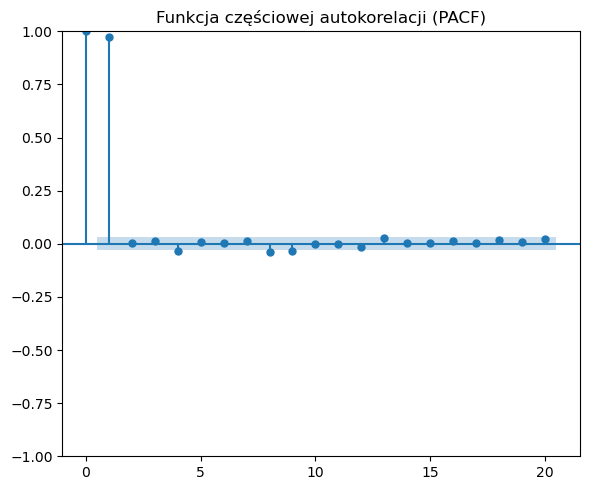

In [3]:
time_series = df['co2']

fig, ax = plt.subplots(figsize=(6, 5))
sm.graphics.tsa.plot_pacf(time_series, lags=20, ax=ax)

ax.set_title('Funkcja częściowej autokorelacji (PACF)') #Partial Autocorrelation Function
plt.tight_layout()
plt.show()

1. Feautre engineering

In [4]:
# Add indexes
df[config.additional_index] = df["country"]
df = df.set_index([config.year_index, config.additional_index])

In [5]:
data_preparer = DataPreparer()

1a. ARIMAX

In [6]:
#ARIMAX with 1 lag
arimax1_df = data_preparer.create_arimax_lightgbm_data(df, config.additional_index)
arimax1_df

,,population_lag_1,gdp_lag_1,temperature_change_from_co2_lag_1,cement_co2_lag_1,coal_co2_lag_1,flaring_co2_lag_1,gas_co2_lag_1,land_use_change_co2_lag_1,oil_co2_lag_1,co2
year,country_index,,,,,,,,,,
1929,Argentina,11139114.0,7.716888e+10,0.004,0.116,8.284,0.000,0.297,228.958,4.041,242.878
1930,Argentina,11443159.0,8.069191e+10,0.004,0.174,8.321,0.000,0.458,229.748,4.177,194.678
1931,Argentina,11726853.0,7.735969e+10,0.004,0.189,8.119,0.000,0.454,181.910,4.005,163.215
1932,Argentina,11989069.0,7.199214e+10,0.004,0.265,6.947,0.000,0.564,150.371,5.067,145.940
1933,Argentina,12228636.0,6.962483e+10,0.004,0.247,6.331,0.000,0.769,132.840,5.752,134.144
...,...,...,...,...,...,...,...,...,...,...,...
2018,Vietnam,94033048.0,6.341613e+11,0.005,42.735,108.222,1.733,17.877,254.245,59.076,504.751
2019,Vietnam,94914328.0,6.815014e+11,0.005,49.637,122.121,1.373,18.554,247.029,66.036,589.843
2020,Vietnam,95776712.0,7.316531e+11,0.006,56.538,191.443,1.453,18.906,248.054,73.449,613.079


1b. LightGBM

In [7]:
#LightGBM with 1 lag
lightgbm1_df = data_preparer.create_arimax_lightgbm_data(df, config.additional_index)
lightgbm1_df

,,population_lag_1,gdp_lag_1,temperature_change_from_co2_lag_1,cement_co2_lag_1,coal_co2_lag_1,flaring_co2_lag_1,gas_co2_lag_1,land_use_change_co2_lag_1,oil_co2_lag_1,co2
year,country_index,,,,,,,,,,
1929,Argentina,11139114.0,7.716888e+10,0.004,0.116,8.284,0.000,0.297,228.958,4.041,242.878
1930,Argentina,11443159.0,8.069191e+10,0.004,0.174,8.321,0.000,0.458,229.748,4.177,194.678
1931,Argentina,11726853.0,7.735969e+10,0.004,0.189,8.119,0.000,0.454,181.910,4.005,163.215
1932,Argentina,11989069.0,7.199214e+10,0.004,0.265,6.947,0.000,0.564,150.371,5.067,145.940
1933,Argentina,12228636.0,6.962483e+10,0.004,0.247,6.331,0.000,0.769,132.840,5.752,134.144
...,...,...,...,...,...,...,...,...,...,...,...
2018,Vietnam,94033048.0,6.341613e+11,0.005,42.735,108.222,1.733,17.877,254.245,59.076,504.751
2019,Vietnam,94914328.0,6.815014e+11,0.005,49.637,122.121,1.373,18.554,247.029,66.036,589.843
2020,Vietnam,95776712.0,7.316531e+11,0.006,56.538,191.443,1.453,18.906,248.054,73.449,613.079


In [8]:
#LightGBM with 1 lag + 1 diff
lightgbm2_df = data_preparer.divide_by_population(df)
lightgbm2_df = data_preparer.create_arimax_lightgbm_data(lightgbm2_df, config.additional_index)
lightgbm2_df

,,population_lag_1,gdp_lag_1,temperature_change_from_co2_lag_1,cement_co2_lag_1,coal_co2_lag_1,flaring_co2_lag_1,gas_co2_lag_1,land_use_change_co2_lag_1,oil_co2_lag_1,co2
year,country_index,,,,,,,,,,
1929,Argentina,11139114.0,6927.739277,3.590950e-10,1.041375e-08,7.436857e-07,0.000000e+00,2.666280e-08,0.000021,3.627757e-07,0.000021
1930,Argentina,11443159.0,7051.541686,3.495538e-10,1.520559e-08,7.271593e-07,0.000000e+00,4.002391e-08,0.000020,3.650216e-07,0.000017
1931,Argentina,11726853.0,6596.798445,3.410975e-10,1.611686e-08,6.923426e-07,0.000000e+00,3.871456e-08,0.000016,3.415239e-07,0.000014
1932,Argentina,11989069.0,6004.814867,3.336372e-10,2.210347e-08,5.794445e-07,0.000000e+00,4.704285e-08,0.000013,4.226350e-07,0.000012
1933,Argentina,12228636.0,5693.589375,3.271011e-10,2.019849e-08,5.177192e-07,0.000000e+00,6.288518e-08,0.000011,4.703713e-07,0.000011
...,...,...,...,...,...,...,...,...,...,...,...
2018,Vietnam,94033048.0,6744.026124,5.317280e-11,4.544679e-07,1.150893e-06,1.842969e-08,1.901140e-07,0.000003,6.282472e-07,0.000005
2019,Vietnam,94914328.0,7180.174029,5.267909e-11,5.229664e-07,1.286645e-06,1.446568e-08,1.954816e-07,0.000003,6.957432e-07,0.000006
2020,Vietnam,95776712.0,7639.154961,6.264571e-11,5.903105e-07,1.998847e-06,1.517070e-08,1.973966e-07,0.000003,7.668774e-07,0.000006


1c. LSTM

In [11]:
lstm_df = data_preparer.create_lstm_data(df, config.year_index, config.additional_index)
lstm_df

,,country_t-3,population_t-3,gdp_t-3,temperature_change_from_co2_t-3,cement_co2_t-3,coal_co2_t-3,flaring_co2_t-3,gas_co2_t-3,land_use_change_co2_t-3,oil_co2_t-3,...,gdp_t-1,temperature_change_from_co2_t-1,cement_co2_t-1,coal_co2_t-1,flaring_co2_t-1,gas_co2_t-1,land_use_change_co2_t-1,oil_co2_t-1,co2_t+1,co2_t+2
year,country_index,,,,,,,,,,,,,,,,,,,,,
1931-1932,Argentina,Argentina,11139114.0,6927.739277,3.590950e-10,1.041375e-08,7.436857e-07,0.000000e+00,2.666280e-08,0.000021,3.627757e-07,...,6596.798445,3.410975e-10,1.611686e-08,6.923426e-07,0.000000e+00,3.871456e-08,0.000016,3.415239e-07,0.000014,0.000012
1932-1933,Argentina,Argentina,11443159.0,7051.541686,3.495538e-10,1.520559e-08,7.271593e-07,0.000000e+00,4.002391e-08,0.000020,3.650216e-07,...,6004.814867,3.336372e-10,2.210347e-08,5.794445e-07,0.000000e+00,4.704285e-08,0.000013,4.226350e-07,0.000012,0.000011
1933-1934,Argentina,Argentina,11726853.0,6596.798445,3.410975e-10,1.611686e-08,6.923426e-07,0.000000e+00,3.871456e-08,0.000016,3.415239e-07,...,5693.589375,3.271011e-10,2.019849e-08,5.177192e-07,0.000000e+00,6.288518e-08,0.000011,4.703713e-07,0.000011,0.000010
1934-1935,Argentina,Argentina,11989069.0,6004.814867,3.336372e-10,2.210347e-08,5.794445e-07,0.000000e+00,4.704285e-08,0.000013,4.226350e-07,...,5854.867767,3.214313e-10,2.041089e-08,4.788523e-07,0.000000e+00,8.308999e-08,0.000010,4.809416e-07,0.000010,0.000009
1935-1936,Argentina,Argentina,12228636.0,5693.589375,3.271011e-10,2.019849e-08,5.177192e-07,0.000000e+00,6.288518e-08,0.000011,4.703713e-07,...,6211.349837,3.158598e-10,2.211019e-08,5.196683e-07,0.000000e+00,9.862722e-08,0.000009,4.840551e-07,0.000009,0.000009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-2018,Vietnam,Vietnam,91235504.0,5694.307791,5.480323e-11,3.583473e-07,8.557305e-07,2.090195e-08,2.148177e-07,0.000004,5.433192e-07,...,6367.751891,5.369039e-11,3.953975e-07,1.147417e-06,1.681583e-08,2.187132e-07,0.000002,6.184382e-07,0.000005,0.000005
2018-2019,Vietnam,Vietnam,92191400.0,6029.002203,5.423499e-11,3.720304e-07,1.061010e-06,1.971984e-08,2.219621e-07,0.000002,6.623937e-07,...,6744.026124,5.317280e-11,4.544679e-07,1.150893e-06,1.842969e-08,1.901140e-07,0.000003,6.282472e-07,0.000005,0.000006
2019-2020,Vietnam,Vietnam,93126528.0,6367.751891,5.369039e-11,3.953975e-07,1.147417e-06,1.681583e-08,2.187132e-07,0.000002,6.184382e-07,...,7180.174029,5.267909e-11,5.229664e-07,1.286645e-06,1.446568e-08,1.954816e-07,0.000003,6.957432e-07,0.000006,0.000006


2. Correlation matrix (ARIMAX)

2a. ARIMAX - lag 1

<Axes: >

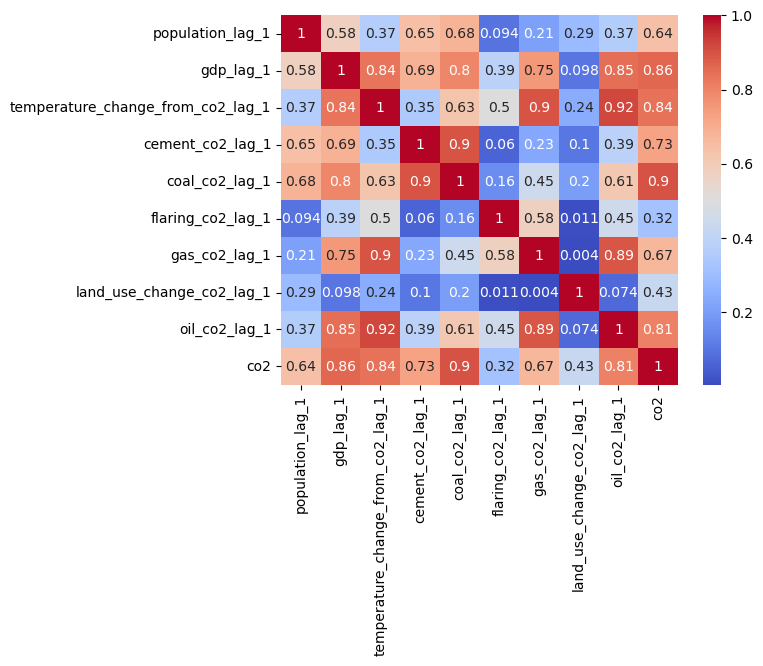

In [12]:
correlation_arimax_matrix = arimax1_df.corr()
sns.heatmap(correlation_arimax_matrix, annot=True, cmap="coolwarm")

In [14]:
# Select only the independent variables (exogenous variables) for which you want to check multicollinearity
X = arimax1_df.drop(columns=['co2'], inplace = False)  # Remove the target variable

# Add a constant (intercept) to the independent variables
X = sm.add_constant(X)

# Create a DataFrame to store the VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Feature,VIF
0,const,0.000000
1,population_lag_1,2.339684
2,gdp_lag_1,12.335091
3,temperature_change_from_co2_lag_1,24.589490
4,cement_co2_lag_1,15.395675
5,coal_co2_lag_1,18.259974
6,flaring_co2_lag_1,1.615192
7,gas_co2_lag_1,10.330716
8,land_use_change_co2_lag_1,1.769418
9,oil_co2_lag_1,9.769070


3. Split to train and test data

In [15]:
data_splitter = DataSplitter()

In [16]:
#ARIMA lag1
train_arimax1_df, test_arimax1_df = data_splitter.split_data(arimax1_df, config.year_index, config.additional_index)
train_arimax1_df

,,population_lag_1,gdp_lag_1,temperature_change_from_co2_lag_1,cement_co2_lag_1,coal_co2_lag_1,flaring_co2_lag_1,gas_co2_lag_1,land_use_change_co2_lag_1,oil_co2_lag_1,co2
year,country_index,,,,,,,,,,
1929,Argentina,11139114.0,7.716888e+10,0.004,0.116,8.284,0.000,0.297,228.958,4.041,242.878
1930,Argentina,11443159.0,8.069191e+10,0.004,0.174,8.321,0.000,0.458,229.748,4.177,194.678
1931,Argentina,11726853.0,7.735969e+10,0.004,0.189,8.119,0.000,0.454,181.910,4.005,163.215
1932,Argentina,11989069.0,7.199214e+10,0.004,0.265,6.947,0.000,0.564,150.371,5.067,145.940
1933,Argentina,12228636.0,6.962483e+10,0.004,0.247,6.331,0.000,0.769,132.840,5.752,134.144
...,...,...,...,...,...,...,...,...,...,...,...
2003,Vietnam,80642304.0,2.506834e+11,0.004,8.274,27.490,1.028,4.100,128.197,28.636,227.212
2004,Vietnam,81475816.0,2.682029e+11,0.004,9.366,31.974,1.214,5.206,149.950,29.501,246.341
2005,Vietnam,82311232.0,2.881490e+11,0.004,10.301,34.792,1.196,8.760,157.402,33.891,206.696


In [17]:
#lightgbm lag1
train_lightgbm1_df, test_lightgbm1_df = data_splitter.split_data(lightgbm1_df, config.year_index, config.additional_index)
train_lightgbm1_df

,,population_lag_1,gdp_lag_1,temperature_change_from_co2_lag_1,cement_co2_lag_1,coal_co2_lag_1,flaring_co2_lag_1,gas_co2_lag_1,land_use_change_co2_lag_1,oil_co2_lag_1,co2
year,country_index,,,,,,,,,,
1929,Argentina,11139114.0,7.716888e+10,0.004,0.116,8.284,0.000,0.297,228.958,4.041,242.878
1930,Argentina,11443159.0,8.069191e+10,0.004,0.174,8.321,0.000,0.458,229.748,4.177,194.678
1931,Argentina,11726853.0,7.735969e+10,0.004,0.189,8.119,0.000,0.454,181.910,4.005,163.215
1932,Argentina,11989069.0,7.199214e+10,0.004,0.265,6.947,0.000,0.564,150.371,5.067,145.940
1933,Argentina,12228636.0,6.962483e+10,0.004,0.247,6.331,0.000,0.769,132.840,5.752,134.144
...,...,...,...,...,...,...,...,...,...,...,...
2003,Vietnam,80642304.0,2.506834e+11,0.004,8.274,27.490,1.028,4.100,128.197,28.636,227.212
2004,Vietnam,81475816.0,2.682029e+11,0.004,9.366,31.974,1.214,5.206,149.950,29.501,246.341
2005,Vietnam,82311232.0,2.881490e+11,0.004,10.301,34.792,1.196,8.760,157.402,33.891,206.696


In [18]:
train_lightgbm2_df.to_csv('../output/0_data_cleaning/lightgbm/lag1_diff1/train_lightgbm_population.csv')

NameError: name 'train_lightgbm2_df' is not defined

In [ ]:
test_lightgbm2_df.to_csv('../output/0_data_cleaning/lightgbm/lag1_diff1/test_lightgbm_population.csv')

In [ ]:
#lightgbm lag1 + diff1
train_lightgbm2_df, test_lightgbm2_df = data_splitter.split_data(lightgbm2_df, config.year_index, config.additional_index) #.drop(columns=['population_lag_1'])
train_lightgbm2_df

In [20]:
train_lstm_df, test_lstm_df = data_splitter.split_data(lstm_df, config.year_index, config.additional_index)
train_lstm_df

,,country_t-3,population_t-3,gdp_t-3,temperature_change_from_co2_t-3,cement_co2_t-3,coal_co2_t-3,flaring_co2_t-3,gas_co2_t-3,land_use_change_co2_t-3,oil_co2_t-3,...,gdp_t-1,temperature_change_from_co2_t-1,cement_co2_t-1,coal_co2_t-1,flaring_co2_t-1,gas_co2_t-1,land_use_change_co2_t-1,oil_co2_t-1,co2_t+1,co2_t+2
year,country_index,,,,,,,,,,,,,,,,,,,,,
1931-1932,Argentina,Argentina,11139114.0,6927.739277,3.590950e-10,1.041375e-08,7.436857e-07,0.000000e+00,2.666280e-08,0.000021,3.627757e-07,...,6596.798445,3.410975e-10,1.611686e-08,6.923426e-07,0.000000e+00,3.871456e-08,0.000016,3.415239e-07,0.000014,0.000012
1932-1933,Argentina,Argentina,11443159.0,7051.541686,3.495538e-10,1.520559e-08,7.271593e-07,0.000000e+00,4.002391e-08,0.000020,3.650216e-07,...,6004.814867,3.336372e-10,2.210347e-08,5.794445e-07,0.000000e+00,4.704285e-08,0.000013,4.226350e-07,0.000012,0.000011
1933-1934,Argentina,Argentina,11726853.0,6596.798445,3.410975e-10,1.611686e-08,6.923426e-07,0.000000e+00,3.871456e-08,0.000016,3.415239e-07,...,5693.589375,3.271011e-10,2.019849e-08,5.177192e-07,0.000000e+00,6.288518e-08,0.000011,4.703713e-07,0.000011,0.000010
1934-1935,Argentina,Argentina,11989069.0,6004.814867,3.336372e-10,2.210347e-08,5.794445e-07,0.000000e+00,4.704285e-08,0.000013,4.226350e-07,...,5854.867767,3.214313e-10,2.041089e-08,4.788523e-07,0.000000e+00,8.308999e-08,0.000010,4.809416e-07,0.000010,0.000009
1935-1936,Argentina,Argentina,12228636.0,5693.589375,3.271011e-10,2.019849e-08,5.177192e-07,0.000000e+00,6.288518e-08,0.000011,4.703713e-07,...,6211.349837,3.158598e-10,2.211019e-08,5.196683e-07,0.000000e+00,9.862722e-08,0.000009,4.840551e-07,0.000009,0.000009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003-2004,Vietnam,Vietnam,79001144.0,2789.618694,5.063218e-11,7.123947e-08,2.622241e-07,1.689849e-08,3.877159e-08,0.000003,2.935780e-07,...,3108.583996,4.960176e-11,1.026012e-07,3.408881e-07,1.274765e-08,5.084180e-08,0.000002,3.550990e-07,0.000003,0.000003
2004-2005,Vietnam,Vietnam,79817768.0,2942.281461,5.011416e-11,8.236261e-08,3.126121e-07,1.666296e-08,3.213570e-08,0.000002,3.202796e-07,...,3291.810148,4.909432e-11,1.149544e-07,3.924355e-07,1.490013e-08,6.389626e-08,0.000002,3.620829e-07,0.000003,0.000002
2005-2006,Vietnam,Vietnam,80642304.0,3108.583996,4.960176e-11,1.026012e-07,3.408881e-07,1.274765e-08,5.084180e-08,0.000002,3.550990e-07,...,3500.725302,4.859604e-11,1.251470e-07,4.226884e-07,1.453022e-08,1.064253e-07,0.000002,4.117421e-07,0.000002,0.000002


3. Preparing exogenous and target variable for arimax

3a. All columns

a) ARIMAX lag1

In [22]:
# Separate target (y) before scaling
y_train_arimax1 = train_arimax1_df['co2']
y_test_arimax1 = test_arimax1_df['co2']

y_train_arimax1.to_csv('../output/0_data_cleaning/arimax/lag1/y_train_arimax.csv')
y_test_arimax1.to_csv('../output/0_data_cleaning/arimax/lag1/y_test_arimax.csv')

In [24]:
# Preprocess (scale) only the exogenous variables, excluding the target
exog_train_arimax1 = train_arimax1_df.drop(columns=['co2'], inplace = False)
exog_test_arimax1 = test_arimax1_df.drop(columns=['co2'], inplace = False)

exog_train_arimax1.to_csv('../output/0_data_cleaning/arimax/lag1/1_exog_train_arimax.csv')
exog_test_arimax1.to_csv('../output/0_data_cleaning/arimax/lag1/1_exog_test_arimax.csv')

b) ARIMAX lag1+diff1

In [26]:
# Separate target (y) before scaling
y_train_arimax2 = train_arimax2_df['co2']
y_test_arimax2 = test_arimax2_df['co2']

y_train_arimax2.to_csv('../output/0_data_cleaning/arimax/lag1_diff1/y_train_arimax.csv')
y_test_arimax2.to_csv('../output/0_data_cleaning/arimax/lag1_diff1/y_test_arimax.csv')

NameError: name 'train_arimax2_df' is not defined

In [27]:
# Preprocess (scale) only the exogenous variables, excluding the target
exog_train_arimax2 = train_arimax2_df.drop(columns=['co2'], inplace = False)
exog_test_arimax2 = test_arimax2_df.drop(columns=['co2'], inplace = False)

exog_train_arimax2.to_csv('../output/0_data_cleaning/arimax/lag1_diff1/1_exog_train_arimax.csv')
exog_test_arimax2.to_csv('../output/0_data_cleaning/arimax/lag1_diff1/1_exog_test_arimax.csv')

NameError: name 'train_arimax2_df' is not defined

3b. Exogenous variables chose by using principal component analysis (PCA)

a) ARIMAX lag1

In [28]:
data_preprocessor_arimax1 = DataScaler()
exog_train_arimax1_scaled, exog_test_arimax1_scaled = data_preprocessor_arimax1.preprocess_data(exog_train_arimax1, exog_test_arimax1)

In [29]:
# Apply PCA to the scaled exogenous variables (training data)
pca = PCA(n_components=0.95)  # Keep components that explain 95% of the variance
exog_train_arimax1_pca = pca.fit_transform(exog_train_arimax1_scaled)
exog_test_arimax1_pca = pca.transform(exog_test_arimax1_scaled)

num_components = exog_train_arimax1_pca.shape[1]
component_names = [f"PC{i+1}" for i in range(num_components)]

exog_train_arimax1_pca_df = pd.DataFrame(exog_train_arimax1_pca, columns=component_names, index=exog_train_arimax1.index)
exog_test_arimax1_pca_df = pd.DataFrame(exog_test_arimax1_pca, columns=component_names, index=exog_test_arimax1.index)

exog_train_arimax1_pca_df.to_csv('../output/0_data_cleaning/arimax/lag1/2_exog_train_arimax_pca_df.csv')
exog_test_arimax1_pca_df.to_csv('../output/0_data_cleaning/arimax/lag1/2_exog_test_arimax_pca_df.csv')


b) ARIMAX lag1+diff1

In [30]:
data_preprocessor_arimax2 = DataScaler()
exog_train_arimax2_scaled, exog_test_arimax2_scaled = data_preprocessor_arimax2.preprocess_data(exog_train_arimax2, exog_test_arimax2)

NameError: name 'exog_train_arimax2' is not defined

In [31]:
# Apply PCA to the scaled exogenous variables (training data)
pca = PCA(n_components=0.95)  # Keep components that explain 95% of the variance
exog_train_arimax2_pca = pca.fit_transform(exog_train_arimax2_scaled)
exog_test_arimax2_pca = pca.transform(exog_test_arimax2_scaled)

num_components = exog_train_arimax2_pca.shape[1]
component_names = [f"PC{i+1}" for i in range(num_components)]

exog_train_arimax2_pca_df = pd.DataFrame(exog_train_arimax2_pca, columns=component_names, index=exog_train_arimax2.index)
exog_test_arimax2_pca_df = pd.DataFrame(exog_test_arimax2_pca, columns=component_names, index=exog_test_arimax2.index)

exog_train_arimax2_pca_df.to_csv('../output/0_data_cleaning/arimax/lag1_diff1/2_exog_train_arimax_pca_df.csv')
exog_test_arimax2_pca_df.to_csv('../output/0_data_cleaning/arimax/lag1_diff1/2_exog_test_arimax_pca_df.csv')

NameError: name 'exog_train_arimax2_scaled' is not defined

4. Handle Categorical Variables + Scaling (LightGBM)

a) LightGBM lag1

In [32]:
data_preprocessor_lightgbm1 = DataScaler()
train_lightgbm1_preprocessed, test_lightgbm1_preprocessed = data_preprocessor_lightgbm1.preprocess_data(train_lightgbm1_df, test_lightgbm1_df)

train_lightgbm1_preprocessed.to_csv('../output/0_data_cleaning/lightgbm/lag1/train_lightgbm.csv')
test_lightgbm1_preprocessed.to_csv('../output/0_data_cleaning/lightgbm/lag1/test_lightgbm.csv')

In [33]:
import pickle

# Save the DataScaler object after it has been fitted
with open('../output/0_data_cleaning/lightgbm/lag1/data_preprocessor_lightgbm1.pkl', 'wb') as f:
    pickle.dump(data_preprocessor_lightgbm1, f)

b) LightGBM lag1+diff1

In [34]:
data_preprocessor_lightgbm2 = DataScaler()
train_lightgbm2_preprocessed, test_lightgbm2_preprocessed = data_preprocessor_lightgbm2.preprocess_data(train_lightgbm2_df, test_lightgbm2_df)

train_lightgbm2_preprocessed.to_csv('../output/0_data_cleaning/lightgbm/lag1_diff1/train_lightgbm.csv')
test_lightgbm2_preprocessed.to_csv('../output/0_data_cleaning/lightgbm/lag1_diff1/test_lightgbm.csv')

NameError: name 'train_lightgbm2_df' is not defined

In [ ]:
import pickle

# Save the DataScaler object after it has been fitted
with open('../output/0_data_cleaning/lightgbm/lag1_diff1/data_preprocessor_lightgbm.pkl', 'wb') as f:
    pickle.dump(data_preprocessor_lightgbm2, f)

5. Handle Categorical Variables + Scaling (LSTM)

In [35]:
data_preprocessor_lstm = DataScaler()
train_lstm_preprocessed, test_lstm_preprocessed = data_preprocessor_lstm.preprocess_data(train_lstm_df, test_lstm_df)

train_lstm_preprocessed.to_csv('../output/0_data_cleaning/lstm/train_lstm.csv')
test_lstm_preprocessed.to_csv('../output/0_data_cleaning/lstm/test_lstm.csv')

In [ ]:
import pickle

# Save the DataScaler object after it has been fitted
with open('../output/0_data_cleaning/lstm/data_preprocessor.pkl', 'wb') as f:
    pickle.dump(data_preprocessor_lstm, f)